# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Jason Ballard

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [21]:
# Dependencies
import requests
from bs4 import BeautifulSoup
import pickle
from collections import Counter
import html5lib
import ipykernel
import spacy
from spacytextblob import spacytextblob
import jupyterlab
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
# Don't forget to load the en_core_web_sm
nlp = spacy.load('en_core_web_sm')
# nlp.add_pipe(spacytextblob)
print("Model loaded successfully!")

Model loaded successfully!


1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

## Question 1: 

In [23]:
# Step 1: Define the URL
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Step 2: Fetch the webpage
response = requests.get(url)
if response.status_code == 200:
    print("Successfully fetched the webpage.")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")
    exit()

# Step 3: Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Step 4: Extract the article HTML (adjust the tag/class as necessary for this specific site)
article = soup.find("article")
if article:
    article_html = article.encode("utf-8")
    print("Article extracted successfully.")
else:
    print("Failed to find the article on the page.")
    exit()

# Step 5: Save to a .pkl file
output_file = "laser_headlights_article.pkl"
with open(output_file, "wb") as f:
    pickle.dump(article_html, f)

print(f"Article saved successfully to {output_file}.")


Successfully fetched the webpage.
Article extracted successfully.
Article saved successfully to laser_headlights_article.pkl.


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [24]:
# Step 1: Load the article HTML from the .pkl file
input_file = "laser_headlights_article.pkl"
with open(input_file, "rb") as f:
    article_html = pickle.load(f)

# Step 2: Parse the HTML using BeautifulSoup
soup = BeautifulSoup(article_html, 'html.parser')

# Step 3: Extract the text content
article_text = soup.get_text()

# Step 4: Print the text content
print(article_text)




How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [25]:
# Step 1: Load the article HTML from the .pkl file
input_file = "laser_headlights_article.pkl"
with open(input_file, "rb") as f:
    article_html = pickle.load(f)

# Step 2: Parse the HTML using BeautifulSoup and extract the text
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Step 3: Load spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Filter out punctuation, stopwords, and whitespace tokens
filtered_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Step 6: Count the frequencies of tokens
token_counts = Counter(filtered_tokens)

# Step 7: Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

# Step 8: Print the results
print("Top 5 most frequent tokens (excluding stopwords, punctuation, and whitespace):")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")


Top 5 most frequent tokens (excluding stopwords, punctuation, and whitespace):
Token: 'laser', Frequency: 35
Token: 'headlights', Frequency: 19
Token: 'headlight', Frequency: 11
Token: 'technology', Frequency: 10
Token: 'led', Frequency: 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [26]:
# Step 1: Load the article HTML from the .pkl file
input_file = "laser_headlights_article.pkl"
with open(input_file, "rb") as f:
    article_html = pickle.load(f)

# Step 2: Parse the HTML using BeautifulSoup and extract the text
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Step 3: Load spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Filter out stopwords, punctuation, and whitespace, and get lemmas
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Step 6: Count the frequencies of the lemmas
lemma_counts = Counter(lemmas)

# Step 7: Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Step 8: Print the results
print("Top 5 most frequent lemmas (excluding stopwords, punctuation, and whitespace):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Top 5 most frequent lemmas (excluding stopwords, punctuation, and whitespace):
Lemma: 'laser', Frequency: 40
Lemma: 'headlight', Frequency: 28
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'led', Frequency: 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [27]:
# Define the scoring methods
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence based on the frequency of interesting tokens.
    
    Args:
        sentence (str): The sentence to be scored.
        interesting_tokens (list of str): A list of interesting tokens.
        
    Returns:
        float: The score as the ratio of interesting tokens to total words.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])
    if total_words == 0:
        return 0  # Avoid division by zero
    interesting_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    return interesting_count / total_words


def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence based on the frequency of interesting lemmas.
    
    Args:
        sentence (str): The sentence to be scored.
        interesting_lemmas (list of str): A list of interesting lemmas.
        
    Returns:
        float: The score as the ratio of interesting lemmas to total words.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])
    if total_words == 0:
        return 0  # Avoid division by zero
    interesting_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    return interesting_count / total_words


# Extract the first sentence from the article
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)
first_sentence = list(doc.sents)[0].text

# Example tokens and lemmas (from Question 3)
frequent_tokens = [token for token, freq in most_common_lemmas]  # Replace with actual tokens from Q3
frequent_lemmas = [lemma for lemma, freq in most_common_lemmas]  # Replace with actual lemmas from Q3

# Score the first sentence
token_score = score_sentence_by_token(first_sentence, frequent_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)

# Print the scores
print(f"First Sentence: {first_sentence}")
print(f"Score by Tokens: {token_score:.4f}")
print(f"Score by Lemmas: {lemma_score:.4f}")


First Sentence: 

How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Score by Tokens: 0.0606
Score by Lemmas: 0.0909


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

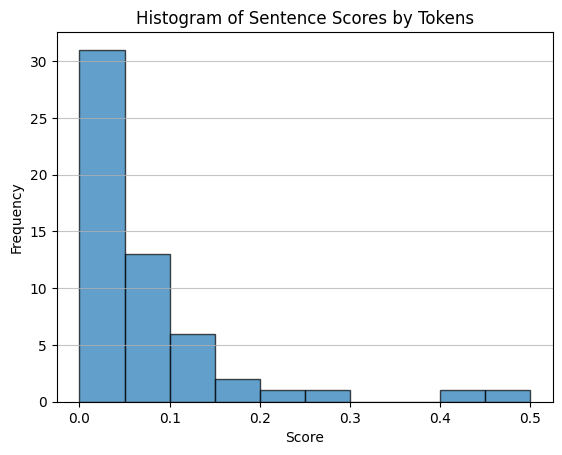

In [28]:
# Load the article HTML from the .pkl file
input_file = "laser_headlights_article.pkl"
with open(input_file, "rb") as f:
    article_html = pickle.load(f)

# Parse the HTML using BeautifulSoup and extract the text
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Load spaCy pipeline
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Define the token scoring method
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence based on the frequency of interesting tokens.
    """
    doc = nlp(sentence)
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])
    if total_words == 0:
        return 0  # Avoid division by zero
    interesting_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    return interesting_count / total_words

# Example frequent tokens (replace with actual from earlier analysis if needed)
frequent_tokens = ["laser", "headlight", "light", "system", "technology"]

# Calculate scores for all sentences in the article using tokens
sentence_scores = [score_sentence_by_token(sent.text, frequent_tokens) for sent in doc.sents]

# Plot a histogram of the scores
plt.hist(sentence_scores, bins=10, edgecolor='black', alpha=0.7)
plt.title("Histogram of Sentence Scores by Tokens")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Most common range of scores will be visually identified from the histogram.


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

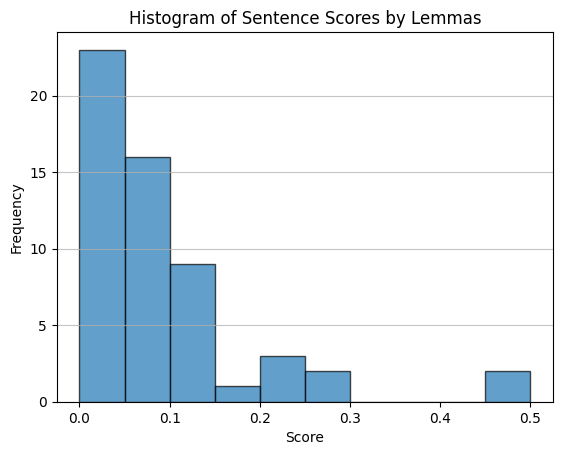

In [29]:
# Load the article HTML from the .pkl file
input_file = "laser_headlights_article.pkl"  # Update the path if necessary
with open(input_file, "rb") as f:
    article_html = pickle.load(f)

# Parse the HTML using BeautifulSoup and extract the text
soup = BeautifulSoup(article_html, 'html.parser')
article_text = soup.get_text()

# Load spaCy pipeline
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Define the lemma scoring method
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence based on the frequency of interesting lemmas.
    """
    doc = nlp(sentence)
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])
    if total_words == 0:
        return 0  # Avoid division by zero
    interesting_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    return interesting_count / total_words

# Example frequent lemmas (replace with actual from earlier analysis if needed)
frequent_lemmas = ["laser", "headlight", "light", "system", "technology"]

# Calculate scores for all sentences in the article using lemmas
sentence_lemma_scores = [score_sentence_by_lemma(sent.text, frequent_lemmas) for sent in doc.sents]

# Plot a histogram of the lemma scores
plt.hist(sentence_lemma_scores, bins=10, edgecolor='black', alpha=0.7)
plt.title("Histogram of Sentence Scores by Lemmas")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Most common range of scores will be visually identified from the histogram.
# Example: The most common range appears to be 0.0 to 0.1.


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Non-noun: Verbs, Adjectives, Adverb, and conjunctions- prepostions and non-content words

Question 3

```python
filtered_tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ == "NOUN"
]
```
Question 4 

```python
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ == "NOUN"
]
```

If we were to count only nouns you woudl get more of the content and less noise from non-content words.

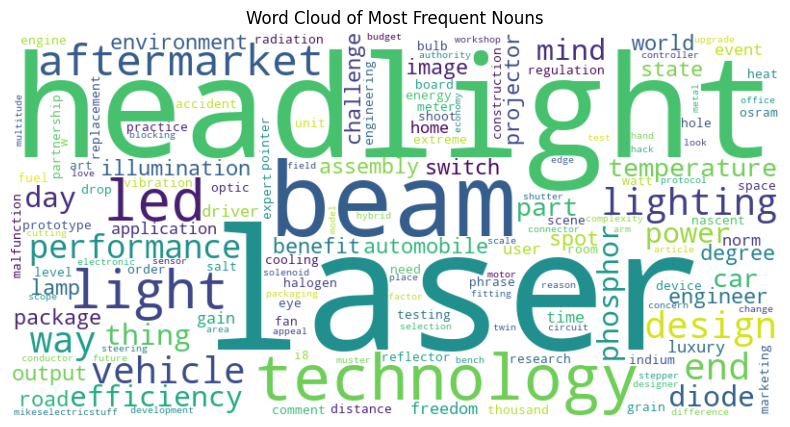

In [30]:
# Extract nouns from the text
nouns = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ == "NOUN"
]

# Count noun frequencies
noun_frequencies = Counter(nouns)

# Generate the Word Cloud
wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap="viridis"
).generate_from_frequencies(noun_frequencies)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Nouns")
plt.show()
